# Matching endangered species in A3cat with conservation data from IUCN Red List

![title](https://static.vecteezy.com/system/resources/previews/026/746/427/non_2x/illustration-image-nature-and-sustainability-eco-friendly-living-and-conservation-concept-art-of-earth-and-animal-life-in-different-environments-generative-ai-illustration-free-photo.jpg)

## 1. Import Libraries

In [1]:
import logging
import pandas as pd
import taxonmatch as txm

In [2]:
# Suppress warnings from the requests library
logging.getLogger("requests").setLevel(logging.ERROR)

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

## 2. Download GBIF and A3cat dataset

In [4]:
gbif_dataset = txm.download_gbif_taxonomy()

GBIF backbone taxonomy data already downloaded.
Processing samples...
Done.


In [5]:
a3cat_dataset = txm.download_ncbi_taxonomy(source = "a3cat")

NCBI taxonomy data already downloaded.
Processing samples...
Done.
a3cat v.2024-08-01 downloaded


## 3. Filtering samples for Arthropoda Phylum

In [6]:
gbif_arthropda, a3cat_arthropoda = txm.select_taxonomic_clade("Arthropoda", gbif_dataset, a3cat_dataset)

## 4. Import xgboost model  

In [7]:
from taxonmatch.loader import load_xgb_model
model = load_xgb_model()

## 5. Matching samples

In [9]:
matched_df, unmatched_df, possible_typos_df = txm.match_dataset(gbif_arthropda, a3cat_arthropoda, model, tree_generation = False)

## 6. Add conservation status to the results

In [10]:
df_with_iucn_status = txm.add_iucn_status_column(matched_df)

Progress: 100.00%


In [11]:
df_with_iucn_status[df_with_iucn_status.iucnRedListCategory.isin(['ENDANGERED', 'CRITICALLY_ENDANGERED', 'VULNERABLE'])]

,taxonID,parentNameUsageID,canonicalName,ncbi_id,ncbi_canonicalName,prediction,score,taxonomicStatus,gbif_taxonomy,ncbi_target_string,ncbi_lineage_names,ncbi_lineage_ids,ncbi_rank,ncbi_lineage_ranks,iucnRedListCategory
851,4311512,4311511.0,Birgus latro,177283,Birgus latro,0.999966,0.0,accepted,arthropoda;malacostraca;decapoda;coenobitidae;birgus;birgus latro,arthropoda;malacostraca;decapoda;coenobitidae;birgus;birgus latro,arthropoda;mandibulata;pancrustacea;crustacea;multicrustacea;malacostraca;eumalacostraca;eucarida;decapoda;pleocyemata;anomura;paguroidea;coenobitidae;birgus;birgus latro,6656;197563;197562;6657;2172821;6681;72041;6682;6683;6692;6738;6744;177219;177282;177283,None,None,VULNERABLE
3365,1542591,1542207.0,Microdon myrmicae,2767528,Microdon myrmicae,0.999966,0.0,accepted,arthropoda;insecta;diptera;syrphidae;microdon;microdon myrmicae,arthropoda;insecta;diptera;syrphidae;microdon;microdon myrmicae,arthropoda;mandibulata;pancrustacea;hexapoda;insecta;dicondylia;pterygota;neoptera;endopterygota;diptera;brachycera;muscomorpha;eremoneura;cyclorrhapha;aschiza;syrphoidea;syrphidae;microdontinae;microdon;microdon myrmicae,6656;197563;197562;6960;50557;85512;7496;33340;33392;7147;7203;43733;480118;480117;43737;43740;34680;43836;115291;2767528,None,None,VULNERABLE
3380,1010608,1010606.0,Tachypleus tridentatus,6853,Tachypleus tridentatus,0.999952,0.04,accepted,arthropoda;merostomata;xiphosurida;limulidae;tachypleus;tachypleus tridentatus,arthropoda;merostomata;xiphosura;limulidae;tachypleus;tachypleus tridentatus,arthropoda;chelicerata;merostomata;xiphosura;limulidae;tachypleus;tachypleus tridentatus,6656;6843;6844;6845;6846;6851;6853,None,None,ENDANGERED
3383,1010610,1010609.0,Limulus polyphemus,6850,Limulus polyphemus,0.999990,0.04,accepted,arthropoda;merostomata;xiphosurida;limulidae;limulus;limulus polyphemus,arthropoda;merostomata;xiphosura;limulidae;limulus;limulus polyphemus,arthropoda;chelicerata;merostomata;xiphosura;limulidae;limulus;limulus polyphemus,6656;6843;6844;6845;6846;6849;6850,None,None,VULNERABLE
4483,4417558,4417557.0,Cherax destructor,6723,Cherax destructor,0.999966,0.0,accepted,arthropoda;malacostraca;decapoda;parastacidae;cherax;cherax destructor,arthropoda;malacostraca;decapoda;parastacidae;cherax;cherax destructor,arthropoda;mandibulata;pancrustacea;crustacea;multicrustacea;malacostraca;eumalacostraca;eucarida;decapoda;pleocyemata;astacidea;parastacoidea;parastacidae;cherax;cherax destructor,6656;197563;197562;6657;2172821;6681;72041;6682;6683;6692;6712;29961;37850;6722;6723,None,None,VULNERABLE
4790,5180071,2235049.0,Lepidurus packardi,63727,Lepidurus packardi,0.999966,0.0,accepted,arthropoda;branchiopoda;notostraca;triopsidae;lepidurus;lepidurus packardi,arthropoda;branchiopoda;notostraca;triopsidae;lepidurus;lepidurus packardi,arthropoda;mandibulata;pancrustacea;crustacea;branchiopoda;phyllopoda;notostraca;triopsidae;lepidurus;lepidurus packardi,6656;197563;197562;6657;6658;116557;58774;63729;63724;63727,None,None,ENDANGERED
4903,1322792,1322791.0,Pseudoatta argentina,621737,Pseudoatta argentina,0.999966,0.0,accepted,arthropoda;insecta;hymenoptera;formicidae;pseudoatta;pseudoatta argentina,arthropoda;insecta;hymenoptera;formicidae;pseudoatta;pseudoatta argentina,arthropoda;mandibulata;pancrustacea;hexapoda;insecta;dicondylia;pterygota;neoptera;endopterygota;hymenoptera;apocrita;aculeata;formicoidea;formicidae;myrmicinae;attini;pseudoatta;pseudoatta argentina,6656;197563;197562;6960;50557;85512;7496;33340;33392;7399;7400;7434;2153479;36668;34695;143999;230680;621737,None,None,VULNERABLE
7806,4535561,1918607.0,Hipparchia sbordonii,2599364,Hipparchia sbordonii,0.999966,0.0,accepted,arthropoda;insecta;lepidoptera;nymphalidae;hipparchia;hipparchia sbordonii,arthropoda;insecta;lepidoptera;nymphalidae;hipparchia;hipparchia sbordonii,arthropoda;mandibulata;pancrustacea;hexapoda;insecta;dicondylia;pterygota;neoptera;endopterygota;amphiesmenoptera;lepidoptera;glossata;neolepidoptera;heteroneura;ditrysi

In [13]:
import matplotlib.pyplot as plt

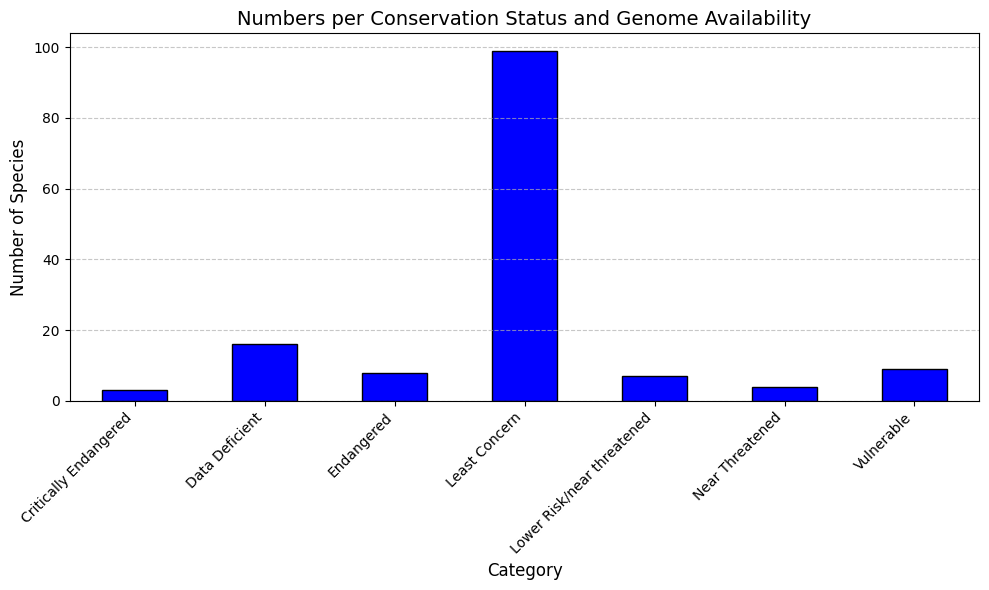

In [74]:
# Generiamo i dati per il grafico senza 'Conservation Status but no Genome'
conservation_statuses = [
    'Critically Endangered', 'Data Deficient', 'Endangered', 'Least Concern', 
    'Lower Risk/near threatened', 'Near Threatened', 'Vulnerable'
]

# Numero di specie senza genoma
unmatched_df_shape = unmatched_df.shape  # Supponendo che questo sia il numero di specie senza genoma

# Calcoliamo il numero di specie per ciascuno stato di conservazione
conservation_counts = last_filtered['redlistCategory'].value_counts().reindex(conservation_statuses, fill_value=0)

# Numero di specie con genoma ma senza stato di conservazione (simulato)
genome_no_status = len(last_filtered[last_filtered['redlistCategory'].isna()])

# Creiamo il DataFrame finale per il plot
plot_data = conservation_counts

# Creiamo il barplot migliorato
plt.figure(figsize=(10, 6))
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c', '#ffff33', '#a65628', '#f781bf']
plot_data.plot(kind='bar', color="blue", edgecolor='black')
plt.title('Numbers per Conservation Status and Genome Availability', fontsize=14)
plt.ylabel('Number of Species', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Visualizzare il grafico
plt.show()